In [85]:
import matplotlib.pyplot as p
import numpy as n
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

[[ 0.80050009  1.06548848  1.29708846 ... -0.05449919  0.41853093
  -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 ... -0.83030083 -1.43658851
  -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 ... -0.05449919  0.06015558
  -0.54515416]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.23293356 -0.98564884
   0.32567395]
 [-0.9560041  -0.93853666  0.82123474 ...  0.55838411  0.93616291
  -0.54515416]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.83030083 -0.08875225
   0.06442552]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

Text(0, 0.5, 'y-axis')

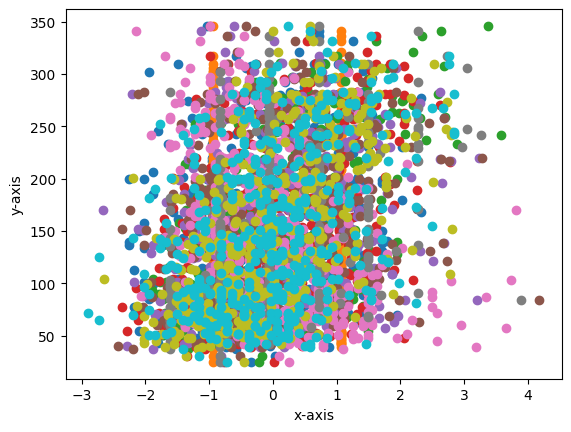

In [86]:
X,y=load_diabetes(return_X_y=True)
scaler=StandardScaler()
xnorm=scaler.fit_transform(X)
print(xnorm)
print(y)
p.plot(xnorm,y,marker='o',linestyle='none')
p.xlabel("x-axis")
p.ylabel("y-axis")

In [87]:
m=n.median(y)

y=(y>m).astype(int)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(xnorm,y,test_size=0.2,random_state=50)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


[[ 1.71693706  1.06548848 -0.06249361 ...  0.72130245 -0.012861
  -0.02265729]
 [-0.57415536 -0.93853666  1.00251235 ...  2.73838671  0.94746994
   2.76399266]
 [ 0.11317236  1.06548848  0.36804071 ...  1.49710409  1.31561916
   0.32567395]
 ...
 [ 0.80050009  1.06548848 -0.19845182 ...  1.05489716 -0.5456329
   2.24149579]
 [-1.26148309 -0.93853666  0.02814519 ... -0.05449919  0.66881874
  -1.15473383]
 [ 0.95323959  1.06548848  0.41336012 ... -0.05449919 -0.06939615
   0.41275676]]
[[-1.10874360e+00  1.06548848e+00 -8.55583153e-01 -1.42208614e+00
  -6.69396041e-01 -7.78149602e-01  7.90393523e-01 -8.30300827e-01
  -7.25778799e-01  1.45775049e+00]
 [-2.68676374e-01 -9.38536661e-01 -1.37675628e+00 -1.47058195e+00
   2.48700132e-02  3.54224334e-01 -6.10285018e-02 -1.47595384e-01
  -6.46437947e-01 -1.06765102e+00]
 [-1.10874360e+00  1.06548848e+00  2.06751830e+00  1.83509471e+00
   1.26876336e+00  1.02574841e+00 -1.22205854e+00  2.27290573e+00
   1.77633271e+00  8.48170817e-01]
 [ 3.42281

In [89]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)


75.28089887640449


In [90]:
confusionmatrix=confusion_matrix(y_test,y_pred)
print(confusionmatrix)

[[35 10]
 [12 32]]


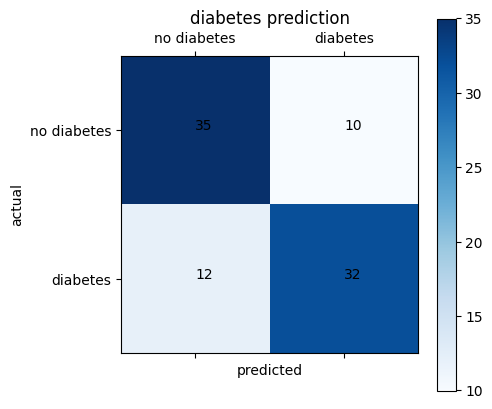

In [91]:
p.matshow(confusionmatrix,cmap="Blues")
p.colorbar()
p.xlabel("predicted")
p.ylabel("actual")
p.xticks([0,1],['no diabetes','diabetes'])
p.yticks([0,1],['no diabetes','diabetes'])
p.title("diabetes prediction")
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        p.text(j,i,str(confusionmatrix[i,j]),color="Black")
p.show()


In [93]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        45
           1       0.76      0.73      0.74        44

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89

